In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 3892 images belonging to 6 classes.


In [4]:
train_generator.class_indices

{'Calculus': 0,
 'Caries': 1,
 'Discoloration': 2,
 'Gingivitis': 3,
 'Hypodontia': 4,
 'Ulcer': 5}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Calculus', 'Caries', 'Discoloration', 'Gingivitis', 'Hypodontia', 'Ulcer']

In [6]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 553 images belonging to 6 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 1118 images belonging to 6 classes.


In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),                       
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 47,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 20
)

Epoch 1/20
47/47 [==============================] - 162s 3s/step - loss: 1.4386 - accuracy: 0.3881 - val_loss: 1.3496 - val_accuracy: 0.5312
Epoch 2/20
47/47 [==============================] - 220s 5s/step - loss: 1.2567 - accuracy: 0.5107 - val_loss: 1.1069 - val_accuracy: 0.5938
Epoch 3/20
47/47 [==============================] - 220s 5s/step - loss: 1.0943 - accuracy: 0.5664 - val_loss: 1.0534 - val_accuracy: 0.6042
Epoch 4/20
47/47 [==============================] - 201s 4s/step - loss: 1.0380 - accuracy: 0.5991 - val_loss: 1.0615 - val_accuracy: 0.5104
Epoch 5/20
47/47 [==============================] - 155s 3s/step - loss: 0.9873 - accuracy: 0.6019 - val_loss: 1.0279 - val_accuracy: 0.5729
Epoch 6/20
47/47 [==============================] - 232s 5s/step - loss: 0.9760 - accuracy: 0.6124 - val_loss: 0.9849 - val_accuracy: 0.5729
Epoch 7/20
47/47 [==============================] - 165s 4s/step - loss: 0.8868 - accuracy: 0.6383 - val_loss: 0.8602 - val_accuracy: 0.6771
Epoch 8/20
47

In [12]:
scores = model.evaluate(test_generator)

35/35 [==============================] - 58s 2s/step - loss: 0.6766 - accuracy: 0.7236


In [13]:
scores

[0.6765720248222351, 0.7236136198043823]

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

20

In [19]:
history.history['loss'][:5]  #show loss of first 5 epochs

[1.4385778903961182,
 1.2566763162612915,
 1.094347596168518,
 1.038022756576538,
 0.9872944355010986]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
val_acc

[0.53125,
 0.59375,
 0.6041666865348816,
 0.5104166865348816,
 0.5729166865348816,
 0.5729166865348816,
 0.6770833134651184,
 0.5677083134651184,
 0.6822916865348816,
 0.6822916865348816,
 0.6666666865348816,
 0.703125,
 0.7239583134651184,
 0.671875,
 0.7239583134651184,
 0.7552083134651184,
 0.7083333134651184,
 0.6927083134651184,
 0.7864583134651184,
 0.71875]

In [22]:
acc

[0.3880697190761566,
 0.510723888874054,
 0.5663539171218872,
 0.5990691781044006,
 0.6018766760826111,
 0.6123670339584351,
 0.6382978558540344,
 0.6515957713127136,
 0.6528149843215942,
 0.6934840679168701,
 0.6815159320831299,
 0.6841755509376526,
 0.696143627166748,
 0.6997318863868713,
 0.722520112991333,
 0.7140957713127136,
 0.7184986472129822,
 0.7359249591827393,
 0.7373670339584351,
 0.751329779624939]

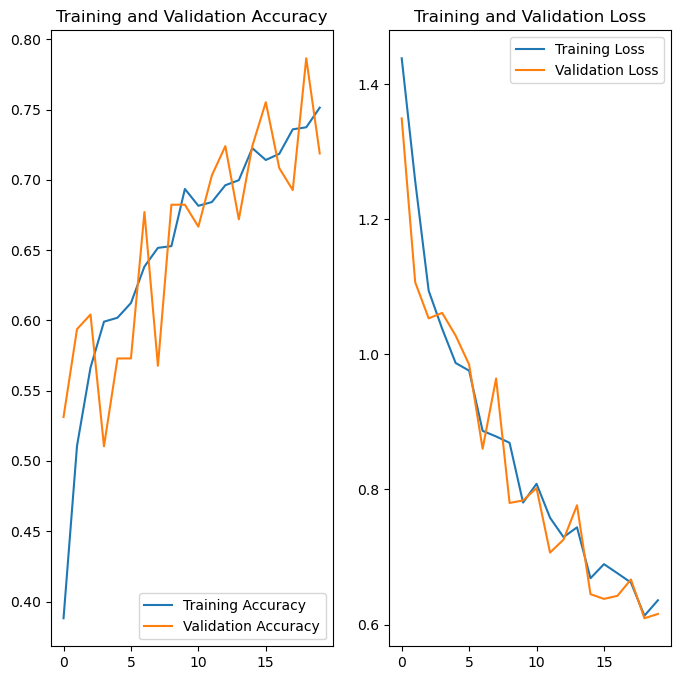

In [23]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Gingivitis
1/1 [==============================] - 1s 1s/step
predicted label: Gingivitis


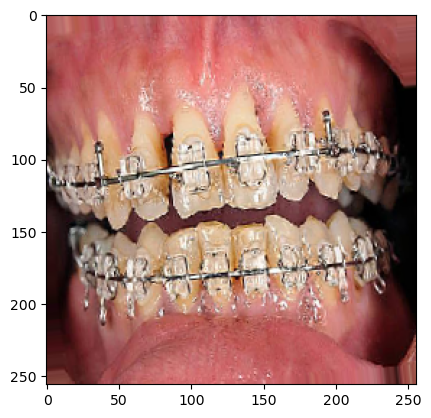

In [24]:
# run Predicition on a Sample Image

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break  

In [25]:
# function for interference 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 58ms/step


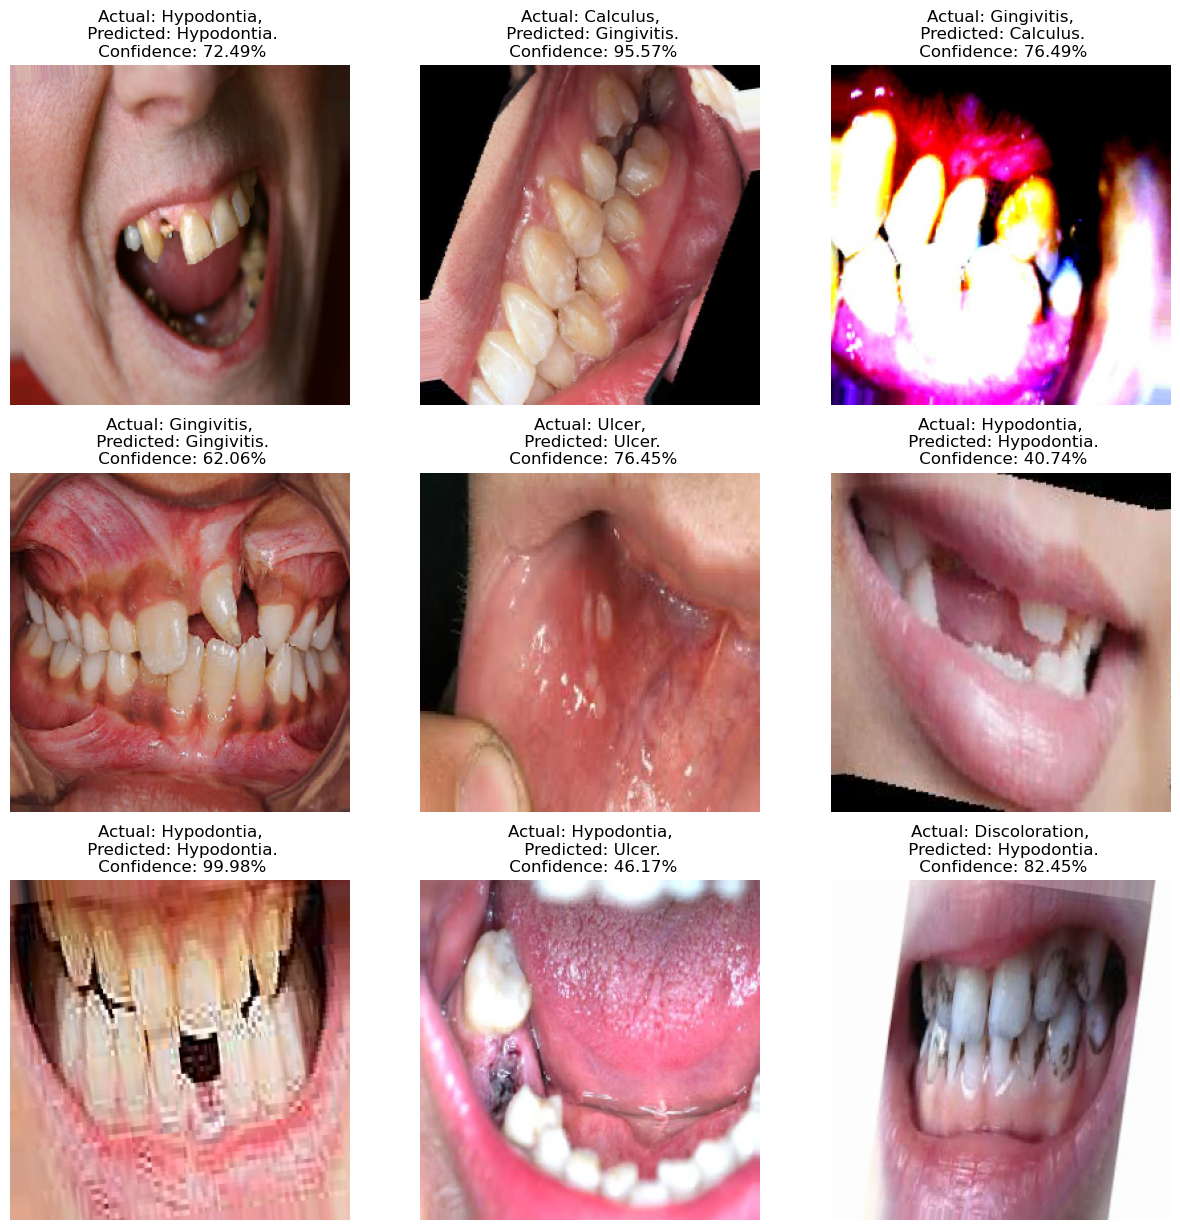

In [26]:
# running interfernce on a few sample images

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [27]:
model.save("../dixi.h5")

/Users/Steven/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
